In [2]:
import numpy as np

galaxy = open('SDSSDATA.txt',"r")

#read each line separately in the data file
lines=galaxy.readlines()
print(lines[0:20])


# split data up 

redshift=[]
comoving_dist=[]
umag = []
rmag = []
classification = []

for x in lines:
    redshift.append(x.split('\t')[2])
    umag.append(x.split('\t')[4])
    rmag.append(x.split('\t')[6])
    classification.append(x.split('\t')[9])
    comoving_dist.append(x.split('\t')[3])


# convert to numpy arrays
redshift = np.array(redshift).astype(np.float)
comoving_dist = np.array(comoving_dist).astype(np.float)
umag = np.array(umag).astype(np.float)
rmag = np.array(rmag).astype(np.float)
classification = np.array(classification).astype(np.float)

galaxy.close()


['348.84109\t1.268802\t0.3996487\t1085.2289\t25.73416\t20.84517\t19.14198\t18.48723\t18.37292\t0\t1\n', '348.90256\t1.2718534\t0.03212454\t95.606178\t19.20196\t18.09918\t17.48643\t17.13313\t16.85331\t0\t2\n', '16.004944\t1.2593887\t0.3120482\t866.95598\t21.41474\t19.61977\t18.42879\t17.88212\t17.52317\t0\t3\n', '16.020233\t1.2676576\t0.2004682\t572.97773\t20.87685\t20.21918\t19.31787\t18.82677\t18.42792\t0\t4\n', '16.02603\t1.2667703\t0.7527238\t1859.5257\t25.17971\t22.24918\t21.28077\t19.91169\t19.44462\t0\t5\n', '41.019618\t1.2712745\t0.5046443\t1332.6628\t22.49448\t21.88898\t20.3207\t19.516\t19.16363\t0\t6\n', '49.248985\t1.2724177\t0.1104592\t322.74678\t20.93582\t18.43388\t17.44124\t17.01057\t16.67018\t0\t7\n', '49.873779\t1.271194\t0.2937785\t820.05105\t22.55805\t21.01344\t19.52304\t18.97612\t18.68725\t0\t8\n', '50.234811\t1.2719279\t0.07428517\t218.92439\t19.28376\t17.95485\t17.37457\t17.05136\t16.85766\t0\t9\n', '51.443703\t1.2700724\t0.1213151\t353.54235\t19.07665\t17.61367\t16

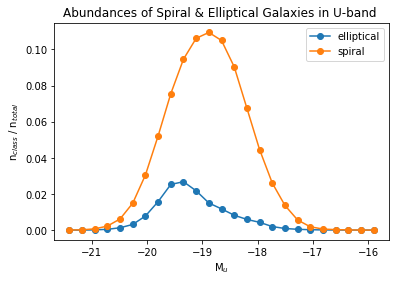

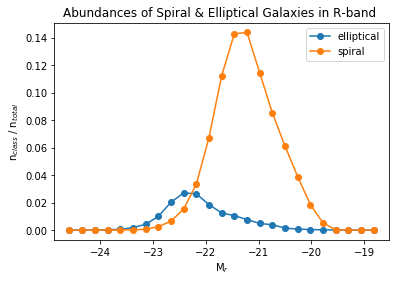

CHECK: Sum of fractions for Rband =  0.9836521855770359
Rband: n_elliptical/n_spiral =  0.1784962196762373
Rband: n_elliptical/n_total =  0.04608766260985372
Rband: n_spiral/n_total =  0.2581996565162508
CHECK: Sum of fractions for Rband =  0.9996087960150651
Uband: n_elliptical/n_spiral =  0.17852265442822768
Uband: n_elliptical/n_total =  0.046691774996962705
Uband: n_spiral/n_total =  0.26154537723241406


In [8]:
from matplotlib import pyplot as plt

# 1a) selections of redshifts in range 0.07 to 0.15 (np.where: gives position in array out of the data set)
selectionz = np.where(np.logical_and(redshift>= 0.07, redshift<= 0.15))
redshiftz = redshift[selectionz[0]]
umagz = umag[selectionz[0]]
rmagz = rmag[selectionz[0]]
classificationz = classification[selectionz[0]]
comoving_distz = comoving_dist[selectionz[0]]

# 2a)  -30 < u & r < 22
selectionu = np.where(np.logical_and(umagz>= -30, umagz<= 22))
selectionr = np.where(np.logical_and(rmagz>= -30, rmagz<= 22))

umagu = umagz[selectionu[0]]
redshiftu = redshiftz[selectionu[0]]               # u band
classificationu = classificationz[selectionu[0]]

rmagr = rmagz[selectionr[0]]
redshiftr = redshiftz[selectionr[0]]               # r band
classificationr = classificationz[selectionr[0]]

# 3a) selections by classification spiral = 1, elliptical = 2

ellipticalu = np.where(np.logical_and(classificationu>= 2, classificationu<= 2)) # u band
spiralu = np.where(np.logical_and(classificationu>= 1, classificationu<= 1))
ellipticalr = np.where(np.logical_and(classificationr>= 2, classificationr<= 2)) # r band
spiralr = np.where(np.logical_and(classificationr>= 1, classificationr<= 1))

umag_ue = umagu[ellipticalu[0]]
umag_us = umagu[spiralu[0]]
redshift_ue = redshiftu[ellipticalu[0]] 
redshift_us = redshiftu[spiralu[0]]

rmag_re = rmagr[ellipticalr[0]]
rmag_rs = rmagr[spiralr[0]]
redshift_re = redshiftr[ellipticalr[0]]
redshift_rs = redshiftr[spiralr[0]]



#calculate absolute magnitdues of u bands by redshift to distance conversion
abs_umag_e = []
abs_umag_s = []
abs_umag_total = []

distance_ue = redshift_ue*(4.4*10**9) # d = z * c/H_0 = 4.4 in parsecs (distance)
distance_us = redshift_us*(4.4*10**9)
distance_u = redshiftu*(4.4*10**9)

for i in range(len(umag_ue)):
    abs_umag_e.append( umag_ue[i] - 5*np.log10(distance_ue[i])+5)
for i in range(len(umag_us)):
    abs_umag_s.append( umag_us[i] - 5*np.log10(distance_us[i])+5) 
for i in range(len(umagu)):
    abs_umag_total.append( umagu[i] - 5*np.log10(distance_u[i])+5) 

# calculate absolute magnitudes of r band
abs_rmag_e = []
abs_rmag_s = []
abs_rmag_total = []

distance_re = (redshift_re)*(4.4*10**9) # d = cz/H_0 in parsecs
distance_rs = (redshift_rs)*(4.4*10**9)
distance_r = (redshiftr)*(4.4*10**9)

for i in range(len(rmag_re)):
    abs_rmag_e.append( rmag_re[i] - 5*np.log10(distance_re[i])+5)
for i in range(len(rmag_rs)):
    abs_rmag_s.append( rmag_rs[i] - 5*np.log10(distance_rs[i])+5)
for i in range(len(rmagr)):
    abs_rmag_total.append( rmagr[i] - 5*np.log10(distance_r[i])+5)  
    

# U_BAND
ave_umag_e,bins = np.histogram(abs_umag_e,bins = 25)
ave_umag_s,bins = np.histogram(abs_umag_s,bins = bins)
ave_umag_total, bins = np.histogram(abs_umag_total, bins)

mid_bin = np.zeros(len(bins)-1)
for i in range(len(bins)-1):
    left = bins[i]
    right = bins[i+1]
    mid_bin[i] = np.mean([left,right])

u_e_frac = ave_umag_e/float(len(umag_ue)+len(umag_us))#np.divide(ave_umag_e[0][0:len(total_u)],total_u)
u_s_frac = ave_umag_s/float(len(umag_ue)+len(umag_us))#np.divide(ave_umag_s[0][0:len(total_u)],total_u)
u_total_frac = ave_umag_total/float(len(umagu))

plt.plot(mid_bin,u_e_frac, 'o-',label = 'elliptical')
plt.plot(mid_bin,u_s_frac, 'o-',label = 'spiral')
#plt.plot(mid_bin,u_total_frac,'o-', label = 'all classes')
plt.xlabel('M$_u$')
plt.ylabel('n$_{class}$ / n$_{total}$')
plt.title('Abundances of Spiral & Elliptical Galaxies in U-band ')
plt.legend()
plt.savefig('u_band.png')
plt.show()

# R-BAND
ave_rmag_e,bins = np.histogram(abs_rmag_e,bins = 25)
ave_rmag_s,bins = np.histogram(abs_rmag_s,bins = bins)
ave_rmag_total, bins = np.histogram(abs_rmag_total, bins)


mid_bin = np.zeros(len(bins)-1)
for i in range(len(bins)-1):
    left = bins[i]
    right = bins[i+1]
    mid_bin[i] = np.mean([left,right])

r_e_frac = ave_rmag_e/float(len(rmag_re)+len(rmag_rs))#np.divide(ave_rmag_e[0][0:len(total_r)],total_r)
r_s_frac = ave_rmag_s/float(len(rmag_re)+len(rmag_rs))#np.divide(ave_rmag_s[0][0:len(total_r)],total_r)
r_total_frac = ave_rmag_total/float(len(rmagr))

plt.plot(mid_bin,r_e_frac,'o-',label = 'elliptical')
plt.plot(mid_bin,r_s_frac,'o-',label = 'spiral')
#plt.plot(mid_bin,r_total_frac,'o-',label = 'all classes')
plt.xlabel('M$_r$')
plt.ylabel('n$_{class}$ / n$_{total}$')
plt.title('Abundances of Spiral & Elliptical Galaxies in R-band ')
plt.legend()
plt.savefig('r_band.png')
plt.show()

print('CHECK: Sum of fractions for Rband = ', sum(r_total_frac) )
print('Rband: n_elliptical/n_spiral = ',(len(abs_rmag_e))/(len(abs_rmag_s)))
print('Rband: n_elliptical/n_total = ',(len(abs_rmag_e))/(len(abs_rmag_total)))
print('Rband: n_spiral/n_total = ',(len(abs_rmag_s))/(len(abs_rmag_total)))

print('CHECK: Sum of fractions for Rband = ', sum(u_total_frac) )
print('Uband: n_elliptical/n_spiral = ',(len(abs_umag_e))/(len(abs_umag_s)))
print('Uband: n_elliptical/n_total = ',(len(abs_umag_e))/(len(abs_umag_total)))
print('Uband: n_spiral/n_total = ',(len(abs_umag_s))/(len(abs_umag_total)))


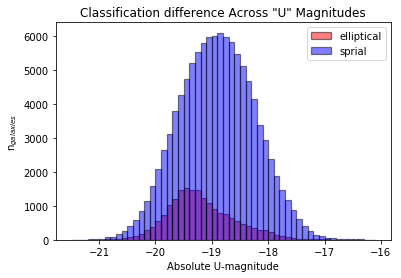

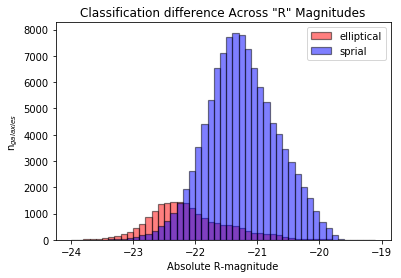

In [112]:
from matplotlib import pyplot as plt
bins = np.arange(-21.5,-16,.1)
plt.hist(abs_umag_e, bins = bins, label = 'elliptical',edgecolor='black', linewidth=1.2,alpha=0.5, color = 'red')
plt.hist(abs_umag_s, bins = bins, label = 'sprial',edgecolor='black', linewidth=1.2,alpha=0.5,color = 'blue')
#plt.plot(dist_mean,dV_rms,color = 'r')
plt.xlabel('Absolute U-magnitude')
plt.ylabel('n$_{galaxies}$')
plt.title('Classification difference Across "U" Magnitudes')
plt.legend()
plt.savefig('u_vs_type_galaxy',type='png')
plt.show()


bins = np.arange(-24,-19,.1)

plt.hist(abs_rmag_e, bins = bins, label = 'elliptical',edgecolor='black', linewidth=1.2,alpha = 0.5,color = 'red')
plt.hist(abs_rmag_s, bins = bins, label = 'sprial',edgecolor='black', linewidth=1.2,alpha =0.5,color = 'blue')
#plt.plot(dist_mean,dV_rms,color = 'r')
plt.xlabel('Absolute R-magnitude')
plt.ylabel('n$_{galaxies}$')
plt.title('Classification difference Across "R" Magnitudes')
plt.legend()
plt.savefig('r_vs_type_galaxy',type='png')
plt.show()
